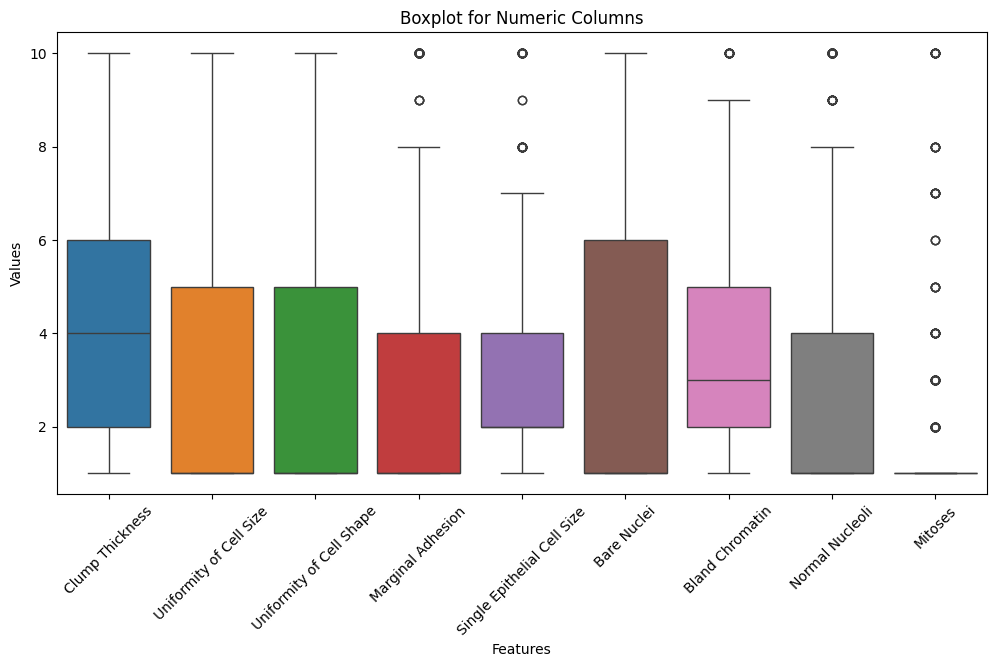

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.metrics import classification_report, accuracy_score

# Assuming the data is stored in a DataFrame named df
# Replace df with the name of your DataFrame if different

# Assuming the DataFrame has the following columns:
# 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
# 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
# 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'

# Load the data into a DataFrame
data_path = r"G:\Concordia Uni semester 1\INSE 6220\Tutorial Project\Breast Cancer Prediction.csv"

# Remove the non-numeric 'Class' column
numeric_columns = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
                   'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

# Plot boxplot for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot for Numeric Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()




C:\Users\admin\AppData\Local\Temp\ipykernel_9060\1721790295.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_df.fillna(method='ffill', inplace=True)  # Filling missing values with the previous value


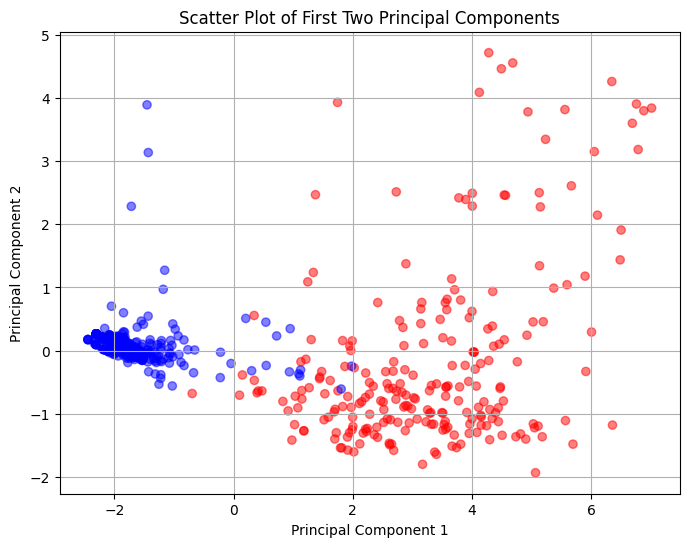

In [25]:

df = pd.read_csv(data_path, encoding='utf-8')  # Try 'latin1' if 'utf-8' doesn't work

# Preprocessing: Drop non-numeric columns if any
numeric_df = df.drop(columns=["Sample code number"])

# Preprocessing: Handle missing values if any
numeric_df.fillna(method='ffill', inplace=True)  # Filling missing values with the previous value

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Transform the data to the principal components
principal_components = pca.transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])

# Plot the first two principal components with different colors based on the 'Class' column
plt.figure(figsize=(8, 6))
class_colors = {2: 'blue', 4: 'red'}  # Assuming '2' represents benign and '4' represents malignant
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=df['Class'].map(class_colors), alpha=0.5)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


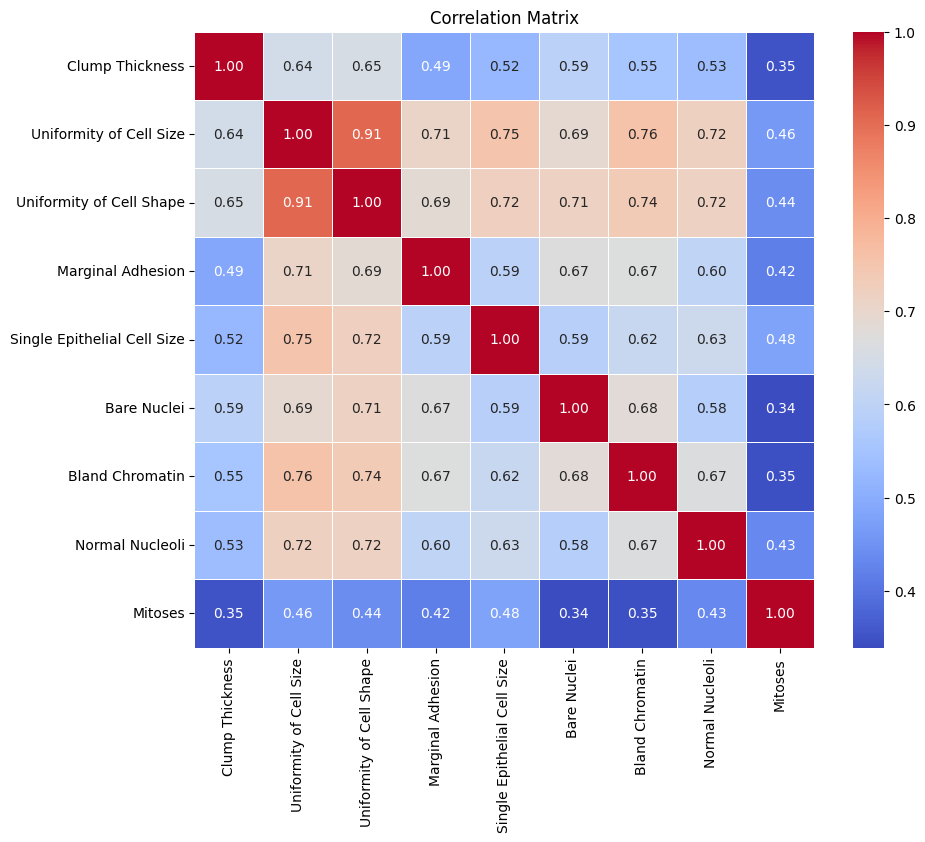

In [15]:
df = pd.read_csv(file_path)

# Assuming the DataFrame has the following columns:
# 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
# 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
# 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'

# Remove the non-numeric 'Class' column
numeric_columns = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
                   'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

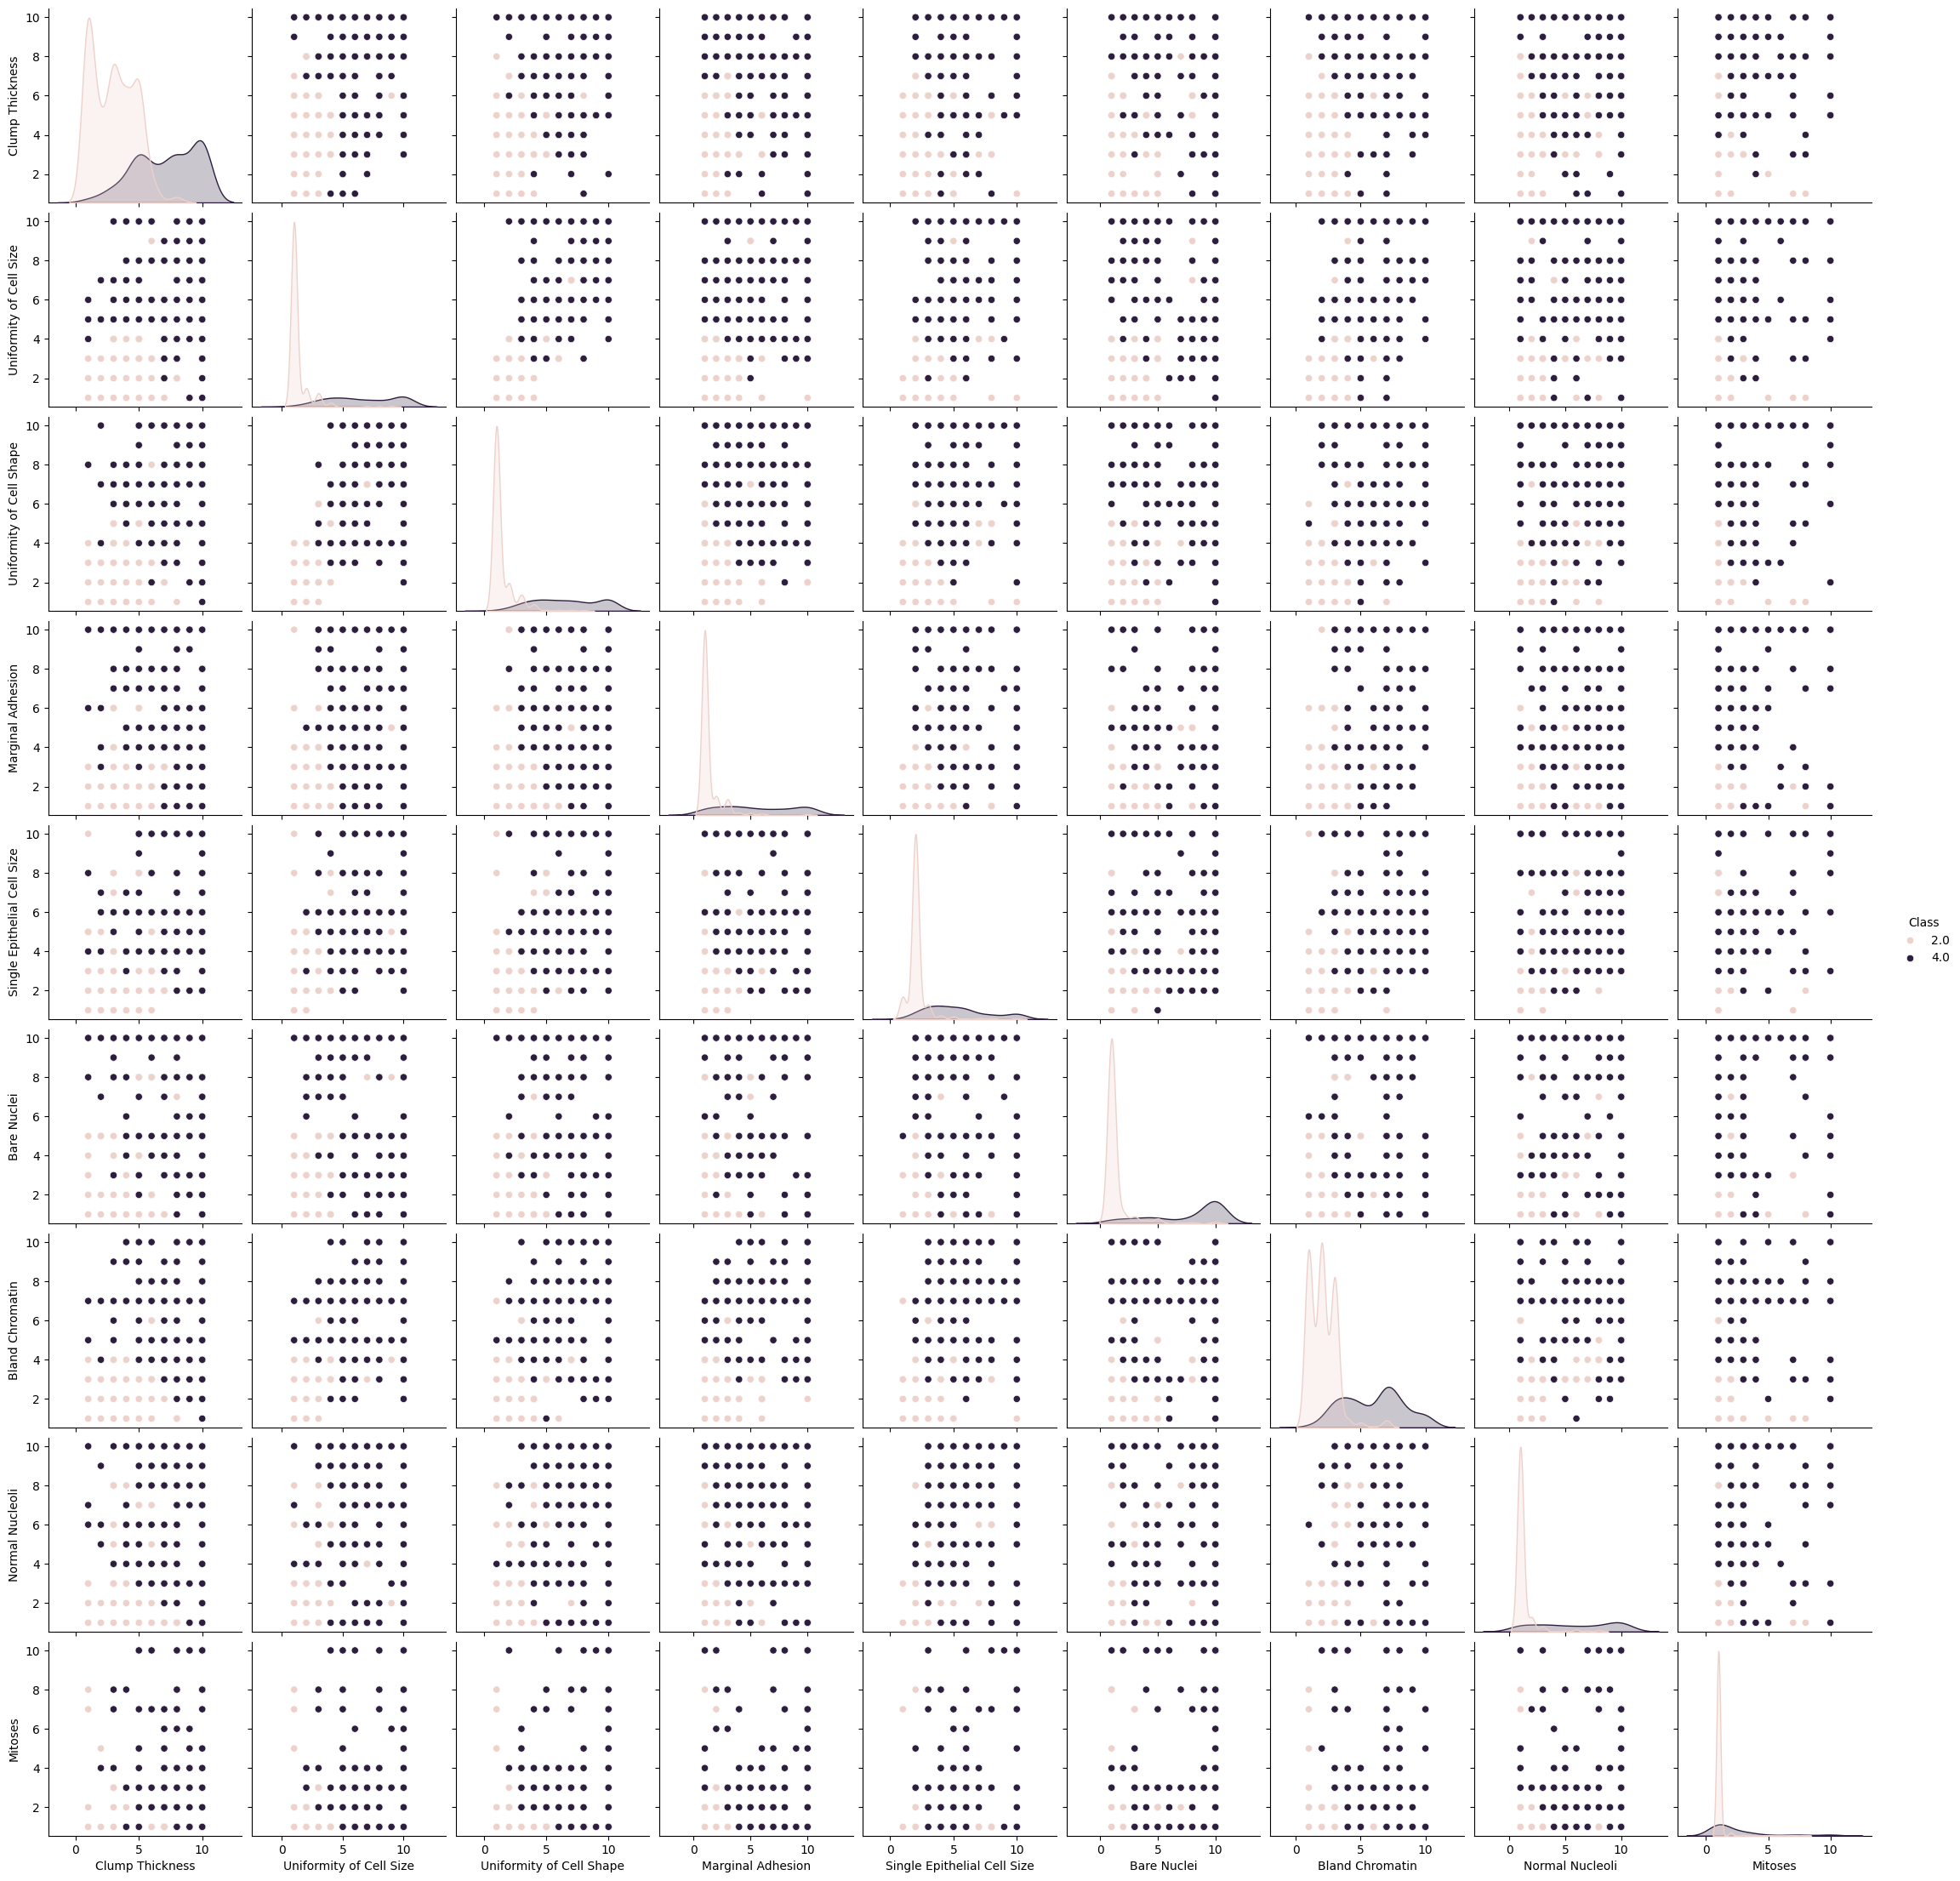

In [26]:


# Replace missing values (if any)
data.replace('?', pd.NA, inplace=True) # Assuming missing values are represented as '?'
# Convert data types
data = data.astype(float)

# Drop 'Sample code number' column as it's not relevant for visualization
data.drop('Sample code number', axis=1, inplace=True)

# Plot pair plot
sns.pairplot(data, hue='Class')
plt.show()


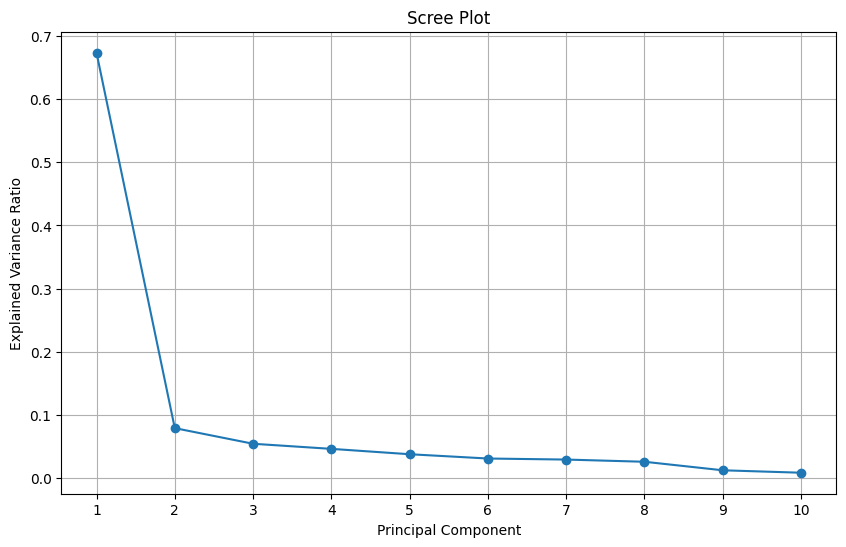

In [22]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


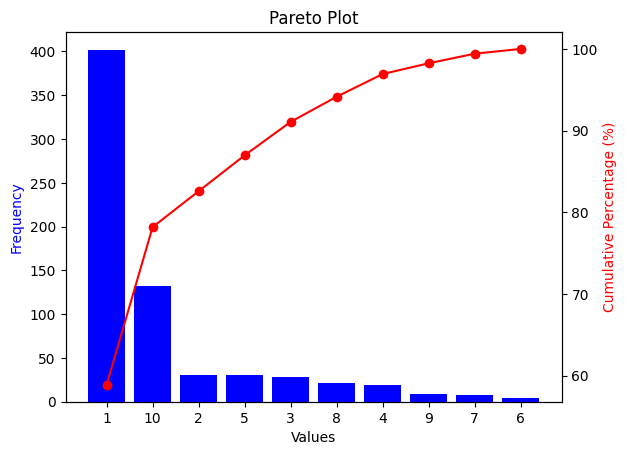

In [27]:
df = pd.read_csv(data_path)

# Assuming you want to create a Pareto plot for the 'Bare Nuclei' column
# Replace 'Bare Nuclei' with the column name you want to analyze if different

# Count the occurrences of each value in the 'Bare Nuclei' column
value_counts = df['Bare Nuclei'].value_counts()

# Calculate the cumulative percentage
cumulative_percentage = (value_counts.cumsum() / value_counts.sum()) * 100

# Create the Pareto plot
fig, ax1 = plt.subplots()

# Plot the bar plot
ax1.bar(value_counts.index.astype(str), value_counts.values, color='b')
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency', color='b')

# Create a secondary y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(value_counts.index.astype(str), cumulative_percentage, color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')

# Show the plot
plt.title('Pareto Plot')
plt.show()

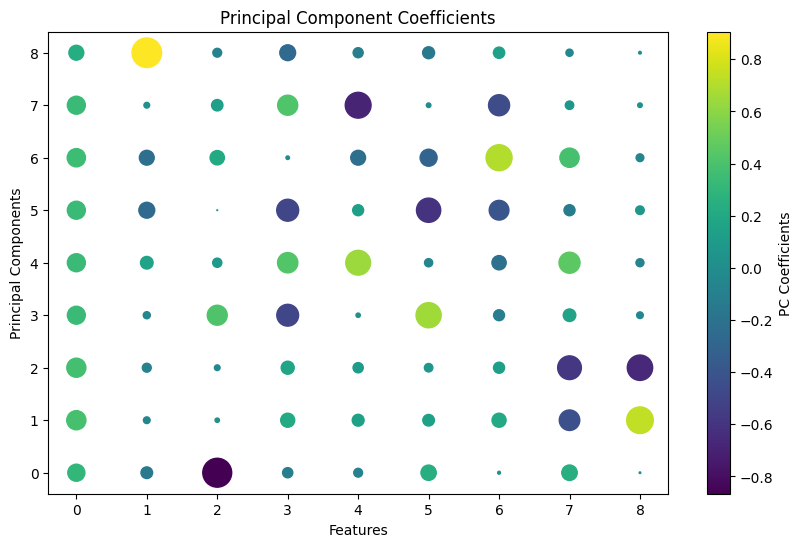

In [28]:
data = pd.read_csv(data_path)

# Separate features (X) and labels (y)
X = data.drop(columns=['Sample code number', 'Class'])  
y = data['Class']  

# Impute missing values with mean
X.fillna(X.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Get the principal component coefficients
pc_coefficients = pca.components_

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(np.repeat(np.arange(len(X.columns)), len(pc_coefficients)), 
            np.tile(np.arange(len(pc_coefficients)), len(X.columns)), 
            s=np.abs(pc_coefficients.flatten()) * 500, 
            c=pc_coefficients.flatten(), cmap='viridis')
plt.colorbar(label='PC Coefficients')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('Principal Component Coefficients')
plt.show()

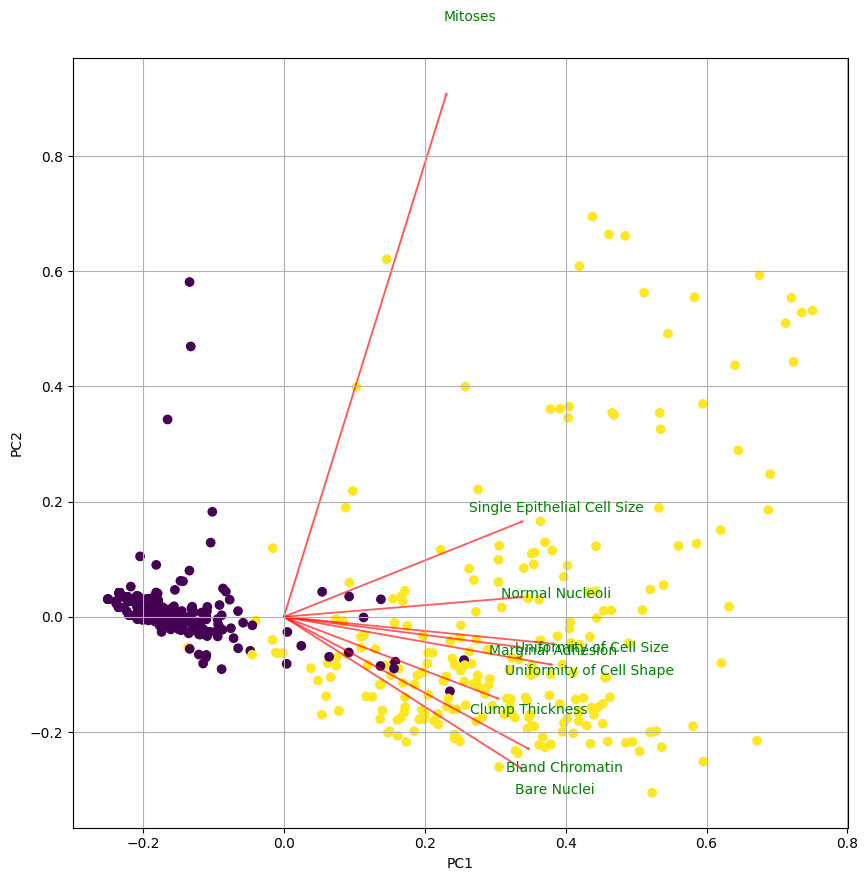

In [29]:
data = pd.read_csv(data_path)

# Separate features (X) and labels (y)
X = data.drop(columns=['Sample code number', 'Class'])  
y = data['Class']  

# Impute missing values with mean
X.fillna(X.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Transform data to principal component space
X_pca = pca.transform(X_scaled)

# Biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 10))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=y, cmap='viridis')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

# Call the biplot function
biplot(X_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)
plt.show()

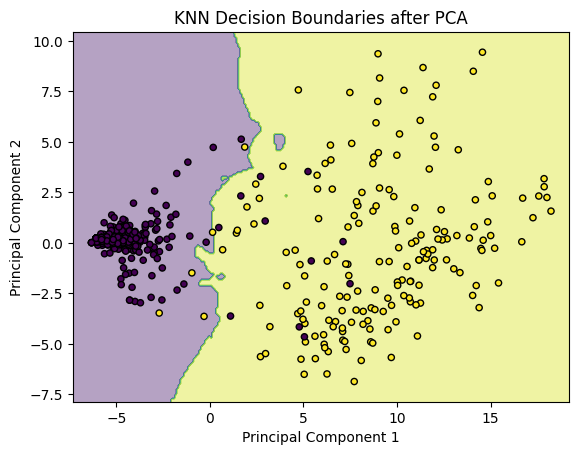

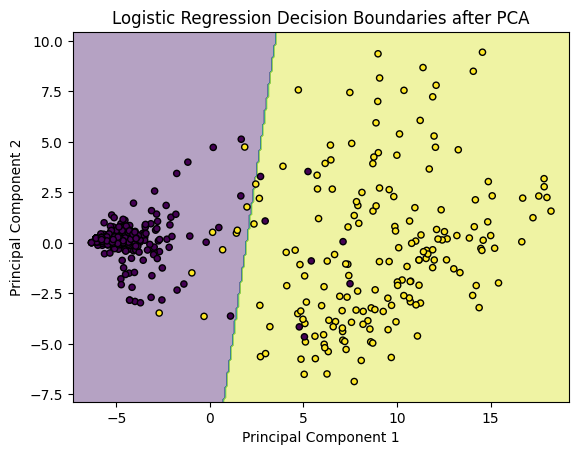

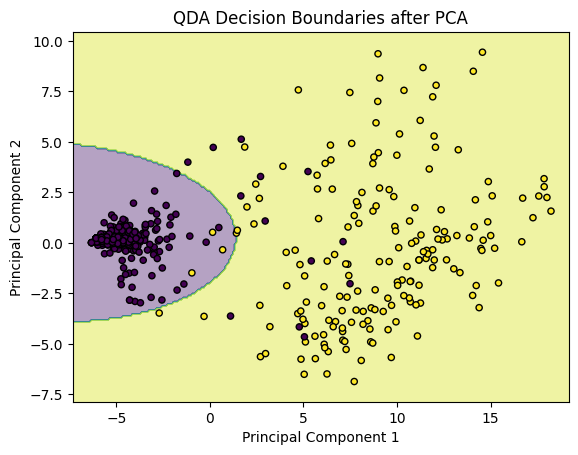

In [34]:
# Load the dataset
breast_cancer_data = pd.read_csv(r"G:\Concordia Uni semester 1\INSE 6220\Tutorial Project\Breast Cancer Prediction.csv")

# Preprocessing: Drop the ID column
breast_cancer_data.drop("Sample code number", axis=1, inplace=True)

# Split features and target
X = breast_cancer_data.drop("Class", axis=1)
y = breast_cancer_data["Class"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on PCA-transformed features
knn_model_pca = KNeighborsClassifier(n_neighbors=5)
knn_model_pca.fit(X_train_pca, y_train)

# Define a meshgrid to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels for each point in the meshgrid
Z_knn = knn_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# Plot decision boundaries for KNN
plt.contourf(xx, yy, Z_knn, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries after PCA')
plt.show()

# Logistic Regression
logistic_model_pca = LogisticRegression()
logistic_model_pca.fit(X_train_pca, y_train)

# Predict class labels for each point in the meshgrid
Z_logistic = logistic_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logistic = Z_logistic.reshape(xx.shape)

# Plot decision boundaries for logistic regression
plt.contourf(xx, yy, Z_logistic, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundaries after PCA')
plt.show()

# Quadratic Discriminant Analysis
qda_model_pca = QuadraticDiscriminantAnalysis()
qda_model_pca.fit(X_train_pca, y_train)

# Predict class labels for each point in the meshgrid
Z_qda = qda_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda.reshape(xx.shape)

# Plot decision boundaries for QDA
plt.contourf(xx, yy, Z_qda, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('QDA Decision Boundaries after PCA')
plt.show()


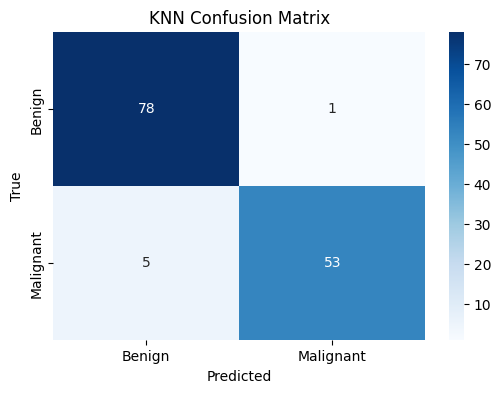

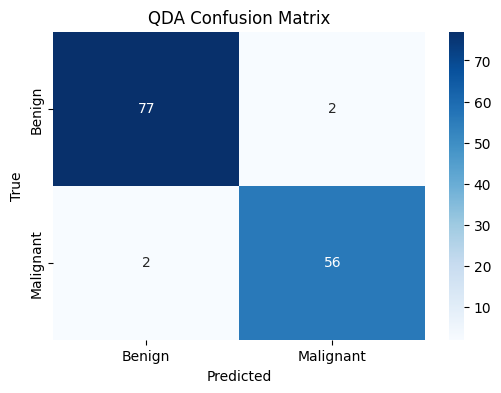

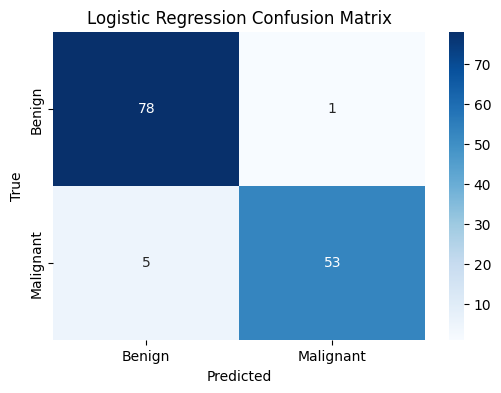

In [35]:
data = pd.read_csv(r"G:\Concordia Uni semester 1\INSE 6220\Tutorial Project\Breast Cancer Prediction.csv")

# Preprocessing: Drop the ID column
data.drop("Sample code number", axis=1, inplace=True)

# Preprocessing
X = data.drop(columns=['Class'])  # Removed 'Sample code number' from drop columns
y = data['Class'].replace({2: 0, 4: 1})  # Convert class labels to binary (0: benign, 1: malignant)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)  # Specify the number of components
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train classifiers
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Use this function to plot confusion matrix for each classifier
plot_confusion_matrix(y_test, knn.predict(X_test), ['Benign', 'Malignant'], title='KNN Confusion Matrix')
plot_confusion_matrix(y_test, qda.predict(X_test), ['Benign', 'Malignant'], title='QDA Confusion Matrix')
plot_confusion_matrix(y_test, logistic_reg.predict(X_test), ['Benign', 'Malignant'], title='Logistic Regression Confusion Matrix')


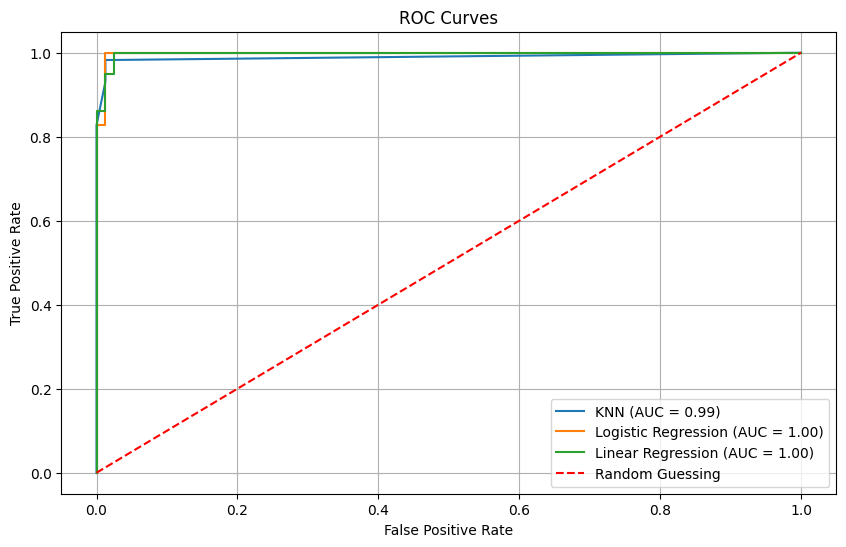

In [37]:
data = pd.read_csv(r"G:\Concordia Uni semester 1\INSE 6220\Tutorial Project\Breast Cancer Prediction.csv")

# Preprocessing
X = data.drop(columns=['Sample code number', 'Class'])
y = data['Class'].map({2: 0, 4: 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifiers
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Plot ROC curves
plt.figure(figsize=(10, 6))

# KNN ROC
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')

# Logistic Regression ROC
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')

# Linear Regression ROC
fpr, tpr, thresholds = roc_curve(y_test, lin_reg.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Linear Regression (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

# Show plot
plt.grid()
plt.show()


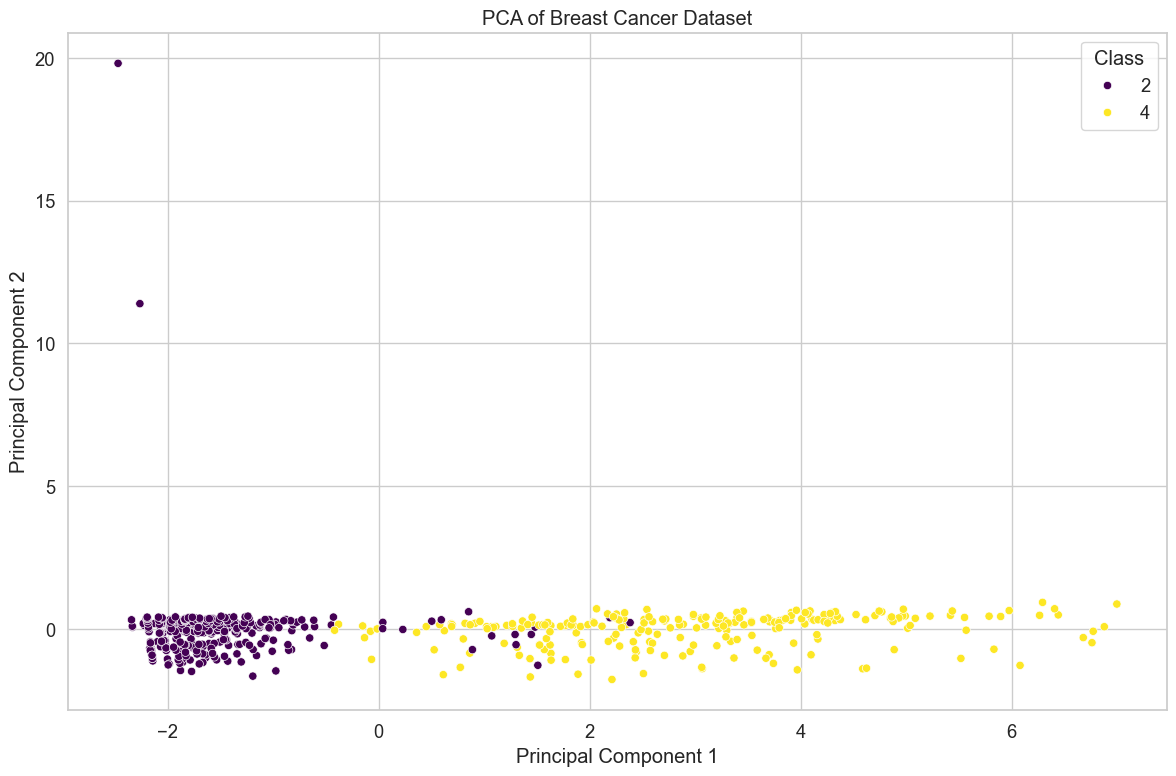

In [38]:
data = pd.read_csv(r"G:\Concordia Uni semester 1\INSE 6220\Tutorial Project\Breast Cancer Prediction.csv")

# Drop the 'Class' column for PCA
X = data.drop('Class', axis=1)

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with the 'Class' column for visualization
pca_df = pd.concat([pca_df, data['Class']], axis=1)

# Plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 8))

# Scatter plot of Principal Components colored by Class
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', palette='viridis')
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)

plt.tight_layout()
plt.show()

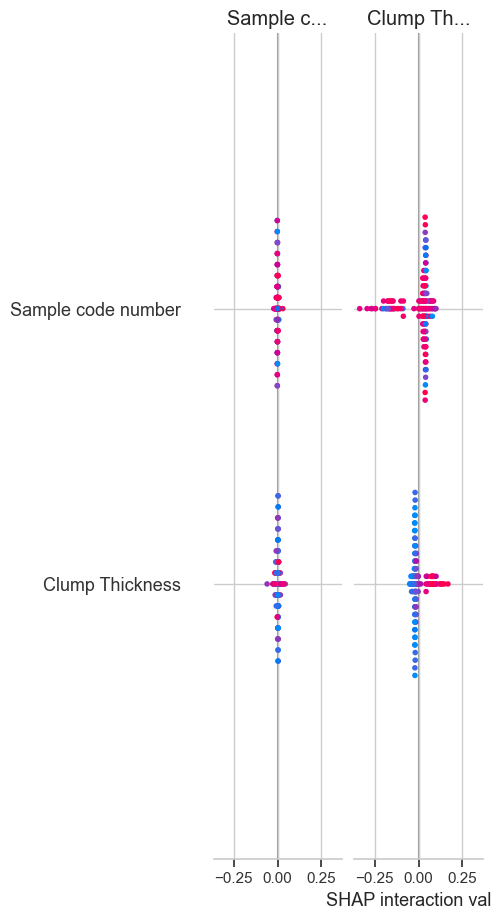

In [39]:
# Load the dataset
data = pd.read_csv(r"G:\Concordia Uni semester 1\INSE 6220\Tutorial Project\Breast Cancer Prediction.csv")

# Preprocessing (if necessary)
# For example, you might need to encode categorical variables or handle missing values

# Separate features and target variable
X = data.drop(columns=["Class"])
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create an explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Generate the summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)  # Adjust max_display as needed
plt.show()
